# Lake Model de Emprego e Desemprego

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definindo os parâmetros
lambda_parameter = 0.283
alpha = 0.013
b = 0.0124
d = 0.00822

g = b - d

assert 0 <= lambda_parameter <= 1
assert 0 <= alpha <= 1
assert 0 <= b <= 1
assert 0 <= d <= 1
assert g > 0 

In [ ]:
# Calculando as Matrizes A e Â
A = np.array([[(1 - d) * (1 - lambda_parameter) + b, (1 - d) * alpha + b],
              [(1 - d) * lambda_parameter, (1 - d) * (1 - alpha)]])


A_hat = (1/(1 + g)) * A

In [ ]:
matriz = np.transpose(A_hat)

for i in range(50):
  matriz = np.dot(matriz, np.transpose(A_hat))


In [ ]:
matriz

array([[0.08266628, 0.91733372],
       [0.08266627, 0.91733373]])

In [ ]:
# Agora, vamos definir alguns valores para realizar a nossa simulação
L_0 = 150 # Numero de trabalhadores
e_0 = 0.92 # Taxa de Emprego
u_0 = 1 - 0.92 # Taxa de Desemprego

E_0 = L_0 * e_0 # Número de pessoas empregadas
U_0 = L_0 * u_0 # Número de pessoas desempregadas

Agora, podemos calcular o Steady State com a seguinte formula:
$$ x_{t + 1} = \hat{A} x_{t} $$

In [ ]:
# Usando essa formula e através de um while, tentaremos chegar a um ponto quando Xt+1 - Xt seja muito proximo de zero.
# Definimos primeiro nossa tolerancia
epsilon = 0.00001

# Definindo x_0
x_0 = np.array([[u_0],
               [e_0]])

# Criando um vetor com trajetoria
trajetoria = [x_0]

# Criando um vetor chamado diferença
diferenca = trajetoria[0] - 0

# Criando uma variavel iterativa
i = 0

# Calculando o Steady State
while abs(max(diferenca)) > epsilon:
  x_tmaisum = np.dot(A_hat, x_0) # Calculando X_t+1

  trajetoria.append(x_tmaisum) # Adicionando ao vetor trajetoria

  diferenca = trajetoria[i + 1] - trajetoria[i] # Calculando diferenca para o criterio de parada

  x_0 = x_tmaisum
  i += 1

In [ ]:
print('O Estado Estacionario da Taxa de Desemprego é:', trajetoria[len(trajetoria) - 1][0])
print('O Estado Estacionario da Taxa de Emprego é:', trajetoria[len(trajetoria) - 1][1])

numero_desempregados = L_0 * sum(trajetoria[len(trajetoria) - 1][0])
numero_empregados = L_0 * sum(trajetoria[len(trajetoria) - 1][1])

print('O número de desempregados é: ', numero_desempregados)
print('O número de empregados é: ', numero_empregados)

O Estado Estacionario da Taxa de Desemprego é: [0.08264981]
O Estado Estacionario da Taxa de Emprego é: [0.91735019]
O número de desempregados é:  12.397471468464921
O número de empregados é:  137.6025285315349


Text(0.5, 1.0, 'Taxa de Emprego')

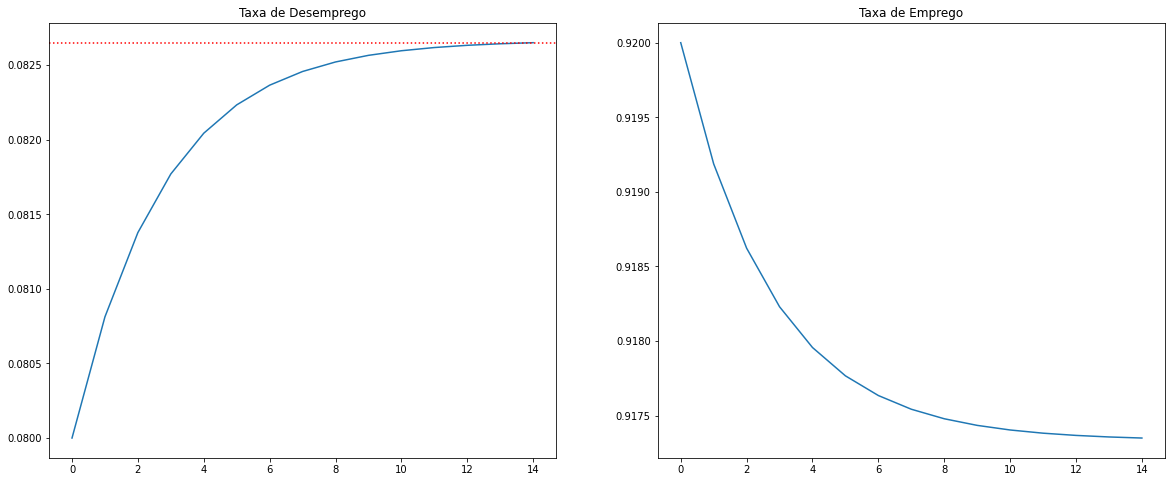

In [ ]:
# Vamos plotar o grafico

eixo_x = list(range(0, len(trajetoria)))

desemprego = [i[0] for i in trajetoria]
emprego = [i[1] for i in trajetoria]

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(eixo_x, desemprego)
plt.axhline(y = desemprego[-1], color = 'r', linestyle = ':')
plt.title('Taxa de Desemprego')

plt.subplot(1, 2, 2)
plt.plot(eixo_x, emprego)
plt.title('Taxa de Emprego')

In [ ]:
trajetoria2 = trajetoria

for i in range(len(trajetoria)):
  trajetoria2.append(trajetoria[-1])

trajetoria2

[array([[0.08],
        [0.92]]), array([[0.08081239],
        [0.91918761]]), array([[0.08137726],
        [0.91862274]]), array([[0.08177001],
        [0.91822999]]), array([[0.08204309],
        [0.91795691]]), array([[0.08223297],
        [0.91776703]]), array([[0.08236499],
        [0.91763501]]), array([[0.08245679],
        [0.91754321]]), array([[0.08252062],
        [0.91747938]]), array([[0.082565],
        [0.917435]]), array([[0.08259585],
        [0.91740415]]), array([[0.08261731],
        [0.91738269]]), array([[0.08263223],
        [0.91736777]]), array([[0.0826426],
        [0.9173574]]), array([[0.08264981],
        [0.91735019]]), array([[0.08264981],
        [0.91735019]]), array([[0.08264981],
        [0.91735019]]), array([[0.08264981],
        [0.91735019]]), array([[0.08264981],
        [0.91735019]]), array([[0.08264981],
        [0.91735019]]), array([[0.08264981],
        [0.91735019]]), array([[0.08264981],
        [0.91735019]]), array([[0.08264981],
      

Text(0.5, 1.0, 'Taxa de Emprego')

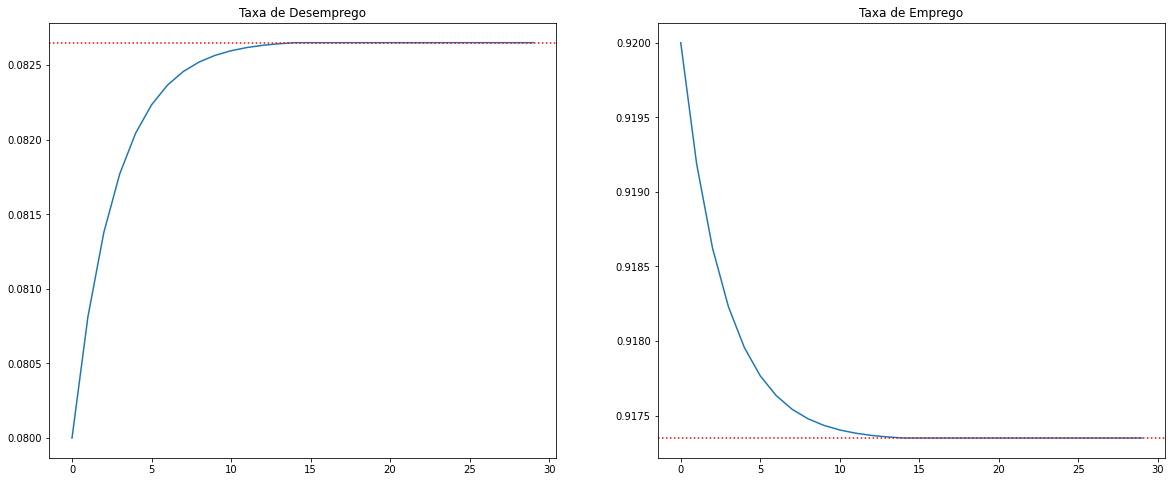

In [ ]:
eixo_x2 = list(range(0, len(trajetoria2)))

desemprego2 = [i[0] for i in trajetoria]
emprego2 = [i[1] for i in trajetoria]

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(eixo_x2, desemprego2)
plt.axhline(y = desemprego2[-1], color = 'r', linestyle = ':')
plt.title('Taxa de Desemprego')

plt.subplot(1, 2, 2)
plt.plot(eixo_x2, emprego2)
plt.axhline(y = emprego2[-1], color = 'r', linestyle = ':')
plt.title('Taxa de Emprego')